In [7]:
#how many times Winner == F and Winner == '11-14' DONE
#F winner times slower than M winner times? DONE
#more runners -> faster parkrun? DONE
#find the parkrun with most and least runners DONE
#avg median DONE
#no. of runners = seasonality? DONE
#plot winners by and age DONE
#more F or M parkrunners DONE
#fastest time ever DONE
#most wins? DONE
# if winner unknown, I counted 1st known time as winning DONE
# account for course change mean winning and overall times pre / post change - Parkrun id 274 DONE
#avg PB per parkrun DONE

# sprint finish
# M and F attendance by age

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data/output/keswick_parkrun.csv')
df = df.drop('Unnamed: 0', axis = 1)
df['Winner'][99] = '20:19' ### to repair a glitch
df['Winner (s)'][99] = 20*60+19

/home/kris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [3]:
df.head(3)

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
0,1.0,113.0,18:11,M,20-24,1693.429907,1664.0,11.0,67.0,40.0,Tim RAYNES,0.0,9.73,1091.0
1,2.0,66.0,17:03,M,20-24,1687.180328,1634.0,7.0,28.0,33.0,Richard ANDERSON,8.0,10.61,1023.0
2,3.0,85.0,18:21,M,45-49,1588.500000,1557.5,6.0,48.0,32.0,Steve ANGUS,4.0,7.06,1101.0


In [28]:
df['Winner Name'].loc[df['Winner M/F'] == 'F']

23           Rosie SMITH
75        Sarah TUNSTALL
220    Hayley CARRUTHERS
224     Rebecca ROBINSON
248       Emily ROBINSON
Name: Winner Name, dtype: object

In [158]:
#Avg F winning time is faster than avg M winning time
round(df['Winner (s)'].loc[df['Winner M/F'] == 'F'].mean() - df['Winner (s)'].loc[df['Winner M/F'] == 'M'].mean(), 2)

32.33

In [38]:
df['Winner (s)'].loc[df['Winner M/F'] == 'M'].mean()

1058.4710144927535

In [6]:
df['Winner Age'].value_counts()

25-29      76
35-39      50
20-24      47
30-34      30
Unknown    22
40-44      20
15-17      18
45-49      17
18-19      12
50-54       8
11-14       2
55-59       1
Name: Winner Age, dtype: int64

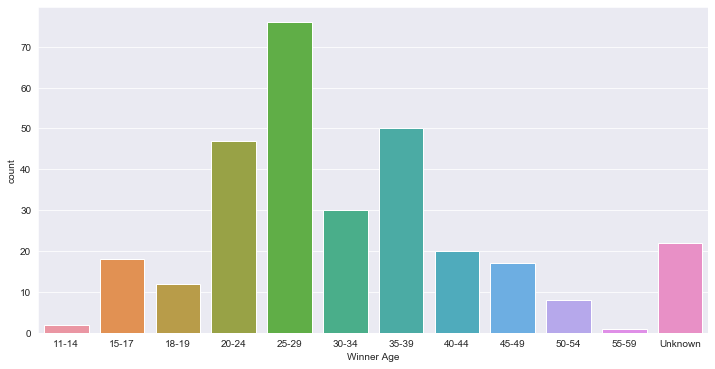

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='Winner Age', data=df.sort_values('Winner Age'))
plt.savefig('data/output/winnerage.png')

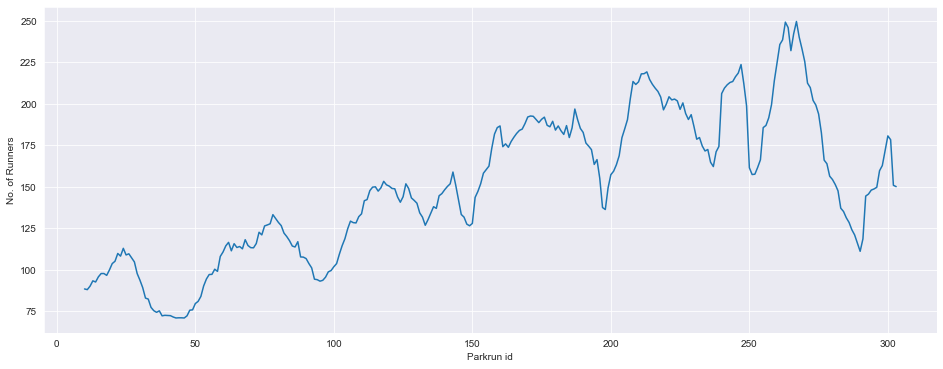

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['Parkrun id'], y=df['No. of Runners'].rolling(10).mean(), data=df)
plt.savefig('data/output/attendance.png')

In [6]:
df[df['No. of Runners'] == df['No. of Runners'].max()]

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
239,240.0,500.0,16:27,M,18-19,1738.925214,1716.5,15.0,220.0,248.0,Luke BOWEN,58.0,3.0,987.0


In [6]:
df['Winner Name'].value_counts()[df['Winner Name'].value_counts() > 1].head(3)

Sam STEAD    42
Mark LAMB    31
Carl BELL    13
Name: Winner Name, dtype: int64

In [9]:
df.loc[df['Winner Age'] == '11-14']

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
39,40.0,78.0,18:15,M,11-14,1615.805195,1605.0,6.0,42.0,35.0,Nathan SMITH,5.0,7.69,1095.0
166,167.0,239.0,18:02,M,11-14,1676.383260,1610.0,11.0,130.0,97.0,Robin REGAN,31.0,4.60,1082.0


In [10]:
df.loc[df['Winner Age'] == '55-59']

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
197,198.0,152.0,18:33,M,55-59,1774.183099,1683.0,4.0,76.0,66.0,Greg PENN,25.0,2.63,1113.0


In [157]:
df.loc[df['Winner Age']== '50-54']

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s),Avg. Time (minutes)
16,17.0,86.0,17:10,M,50-54,1687.303797,1671.0,8.0,41.0,38.0,Simon ANDERSON,12.0,9.30,1030.0,28.121730
48,49.0,74.0,18:55,M,50-54,1706.845070,1692.0,3.0,34.0,37.0,Chris KNOWLES,15.0,4.05,1135.0,28.447418
50,51.0,90.0,18:36,M,50-54,1819.625000,1740.5,4.0,39.0,49.0,Chris KNOWLES,29.0,4.44,1116.0,30.327083
67,68.0,133.0,19:04,M,50-54,1751.761538,1735.0,4.0,51.0,79.0,Pez BULLEN,34.0,3.01,1144.0,29.196026
86,87.0,139.0,21:26,M,50-54,1843.674074,1761.0,0.0,62.0,73.0,John CURRAN,4.0,0.00,1286.0,30.727901
100,101.0,96.0,19:54,M,50-54,1786.670213,1806.0,1.0,49.0,45.0,Darren EDGE,8.0,1.04,1194.0,29.777837
147,148.0,142.0,18:20,M,50-54,1691.104478,1674.0,10.0,69.0,65.0,Richard PATTINSON,30.0,7.04,1100.0,28.185075
255,256.0,162.0,19:05,M,50-54,1691.463087,1635.0,1.0,76.0,73.0,Steve BIRKINSHAW,25.0,0.62,1145.0,28.191051


In [11]:
round(df['No. of Runners'].mean())

149

In [12]:
round(df['F'].mean())

65

In [13]:
round(df['M'].mean())

74

In [20]:
len(df[df['F'] - df['M'] > 0])

51

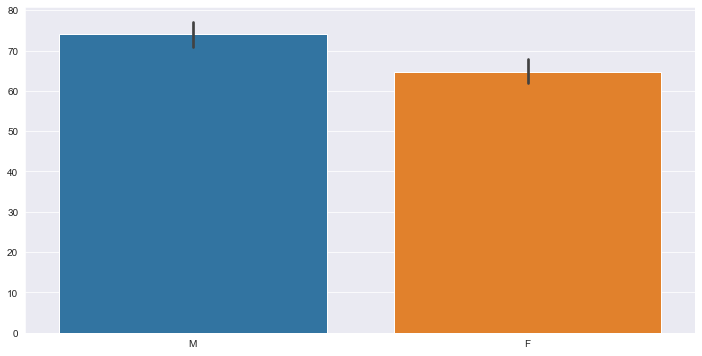

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=df[['M','F']])
plt.savefig('data/output/gender.png')

In [174]:
df.loc[df['F']/df['No. of Runners']-df['M']/df['No. of Runners'] == 
       (df['F']/df['No. of Runners']-df['M']/df['No. of Runners']).max()]

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s),Avg. Time (minutes)
67,68.0,133.0,19:04,M,50-54,1751.761538,1735.0,4.0,51.0,79.0,Pez BULLEN,34.0,3.01,1144.0,29.196026


In [49]:
round(df['New PB'].mean())

22

In [161]:
df[df['New PB'] == df['New PB'].max()]

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s),Avg. Time (minutes)
239,240.0,500.0,16:27,M,18-19,1738.925214,1716.5,15.0,220.0,248.0,Luke BOWEN,58.0,3.0,987.0,28.982087


In [160]:
round(df['Sub 20'].mean())

7

In [26]:
df['Avg. Time (s)'].mean()

1709.6435002258831

In [31]:
from pandas.plotting import scatter_matrix

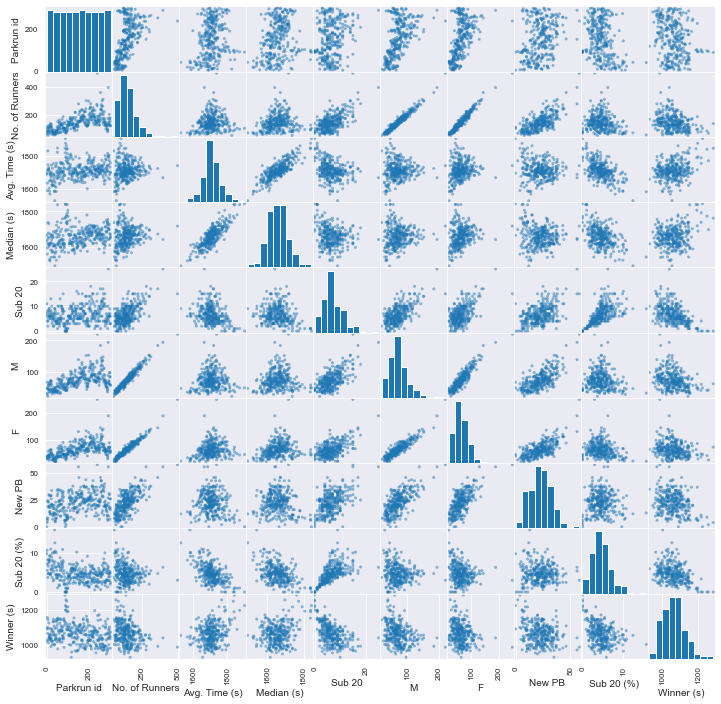

In [35]:
scatter_matrix(df, figsize=(12,12));

In [46]:
df.loc[df['No. of Runners'] == df['No. of Runners'].min()] #smallest parkrun

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
5,6.0,54.0,19:05,M,25-29,1828.06,1736.5,2.0,22.0,28.0,Tom HOWE,8.0,3.7,1145.0


In [45]:
df.loc[df['No. of Runners'] == df['No. of Runners'].max()] #biggest parkrun

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
239,240.0,500.0,16:27,M,18-19,1738.925214,1716.5,15.0,220.0,248.0,Luke BOWEN,58.0,3.0,987.0


In [48]:
df.loc[df['Winner'] == df['Winner'].min()] #fastest kes parkrun time ever

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s)
116,117.0,169.0,15:29,M,18-19,1656.631902,1616.0,10.0,98.0,65.0,Sam STEVENS,35.0,5.92,929.0


''

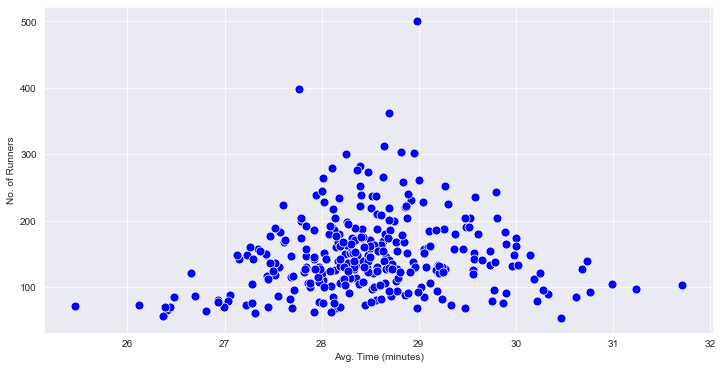

In [5]:
plt.figure(figsize=(12,6))
df['Avg. Time (minutes)'] = df['Avg. Time (s)']/60
sns.scatterplot(y=df['No. of Runners'], x=df['Avg. Time (minutes)'], color='blue', s=80)                
#plt.savefig('data/output/attendance_speed.png')
    #hue=(df['Avg. Time (s)'].mean()-df['Avg. Time (s)'])**2, legend=False,
                #palette = 'jet_r',
                #)
;

In [6]:
df.loc[df['Avg. Time (s)'] == df['Avg. Time (s)'].max()]

,Parkrun id,No. of Runners,Winner,Winner M/F,Winner Age,Avg. Time (s),Median (s),Sub 20,M,F,Winner Name,New PB,Sub 20 (%),Winner (s),Avg. Time (minutes)
88,89.0,104.0,20:26,M,30-34,1902.810526,1843.0,0.0,49.0,46.0,Chris GILL,0.0,0.0,1226.0,31.713509


In [24]:
round(df['Avg. Time (s)'][df['Parkrun id'] >= 274].mean() - df['Avg. Time (s)'][df['Parkrun id'] < 274].mean())

21

In [25]:
round(df['Winner (s)'][df['Parkrun id'] >= 274].mean() - df['Winner (s)'][df['Parkrun id'] < 274].mean())

-22